In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn
import cv2
from PIL import Image
from tqdm import tqdm

In [2]:

labels = np.load('/mnt/storage1/Hover-Net/Fold 1/images/fold1/types.npy')
images = np.load('/mnt/storage1/Hover-Net/Fold 1/images/fold1/images.npy',allow_pickle=True)
masks = np.load('/mnt/storage1/Hover-Net/Fold 1/masks/fold1/masks.npy',allow_pickle=True)

print(labels.shape)
print(images.shape)
print(masks.shape)

(2656,)
(2656, 256, 256, 3)
(2656, 256, 256, 6)


number of 1.Adrenal_gland: 134
number of 2.Bile-duct: 159
number of 3.Bladder: 21
number of 4.Breast: 827
number of 5.Cervix: 155
number of 6.Colon: 478
number of 7.Esophagus: 155
number of 8.HeadNeck: 70
number of 9.Kidney: 37
number of 10.Liver: 65
number of 11.Lung: 80
number of 12.Ovarian: 54
number of 13.Pancreatic: 78
number of 14.Prostate: 77
number of 15.Skin: 59
number of 16.Stomach: 50
number of 17.Testis: 60
number of 18.Thyroid: 80
number of 19.Uterus: 17


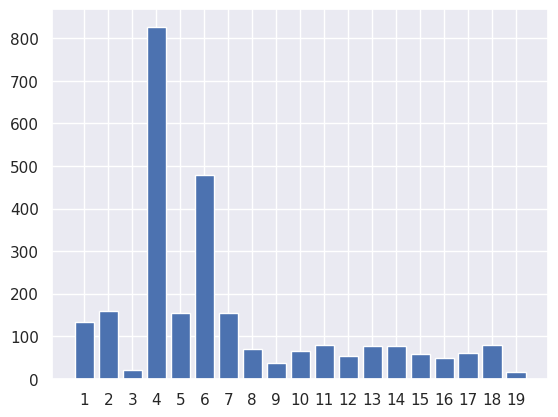

In [3]:
seaborn.set()
classes, counts = np.unique(labels, return_counts=True)

class2integer = {'Adrenal_gland': '1', 'Bile-duct' :'2', 'Bladder': '3', 'Breast': '4',
                 'Cervix': '5', 'Colon': '6', 'Esophagus': '7', 'HeadNeck': '8', 'Kidney': '9',
                 'Liver': '10', 'Lung': '11', 'Ovarian': '12', 'Pancreatic': '13', 'Prostate': '14',
                 'Skin': '15', 'Stomach': '16', 'Testis': '17', 'Thyroid': '18', 'Uterus': '19'}

label_names=['1', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', '11', '12', '13',
             '14', '15', '16', '17', '18', '19']

plt.bar(classes, 
        counts, 
        tick_label=label_names)

for i, idx in enumerate(classes):
    print('number of {}.{}: {}'.format(class2integer[str(idx)], idx, counts[i]))

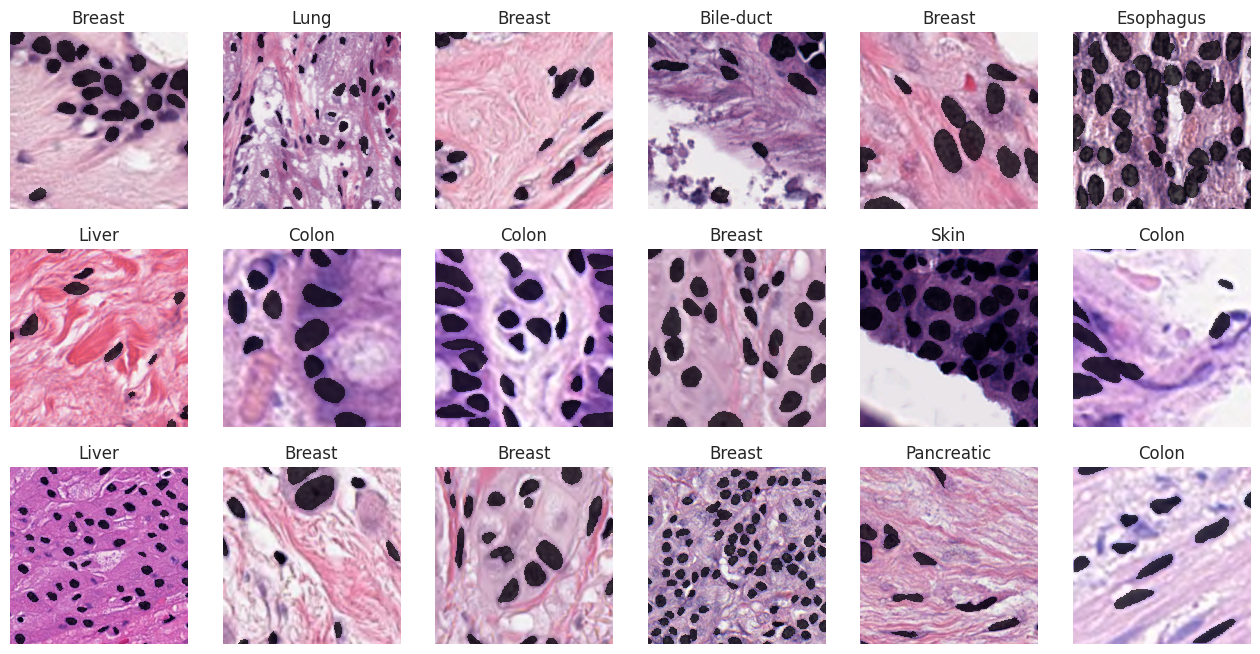

In [4]:
zeros = np.zeros_like(masks[0, :, :, 0], dtype=bool)
ones = np.ones_like(masks[0, :, :, 0], dtype=bool)

combined_masks = np.zeros_like(masks[0, :, :, 0], dtype=bool)

plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    images_int = images[idx, :, :, :].astype(int)
    plt.imshow(images_int, cmap='bone')
    
    # set black pixel as transparent for the mask
    combined_masks = masks[idx, :, :, 0] + masks[idx, :, :, 1] + masks[idx, :, :, 2] + \
                     masks[idx, :, :, 3] + masks[idx, :, :, 4]
    mask_bool = np.where(combined_masks > 0., ones, zeros)
    mask = np.ma.masked_where(mask_bool == False, mask_bool)
    plt.imshow(mask, alpha=0.7, cmap='gray')
    
    plt.title(labels[idx])
    plt.axis('off')

In [5]:
!mkdir ./images
!mkdir ./masks



In [7]:
lbnms = ['inflammatory', 'connective', 'neoplastic', 'epithelial', 'dead']

for i in tqdm(range(images.shape[0]),leave=True, position = 0):
    im = Image.fromarray(images[i, :, :, :].astype(np.uint8))
    im.save('./images/' + str(i) + '.jpeg')

    for j in range(images.shape[-1]-1):
        imsk = Image.fromarray(masks[i, :, :, 0:3].astype(np.uint8))
        imsk.save('./masks/' + str(i) + '.jpeg')

100%|██████████| 2656/2656 [00:05<00:00, 459.10it/s]


In [3]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 118.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
